In [77]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.activations import relu6
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [78]:
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()

In [79]:
print(xtrain)
print(xtest)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

In [80]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [81]:
#xtrain=xtrain.reshape((len(xtrain),28*28))
#xtest=xtest.reshape((len(xtest),28*28))

In [82]:
inputdim=(28,28,1)

In [83]:
codedim=3

In [84]:
inputvec=Input(shape=inputdim)

In [85]:
enc1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputvec)
enc2 = MaxPooling2D((2, 2), padding='same')(enc1)
enc3 = Conv2D(64, (3, 3), activation='relu', padding='same')(enc2)
enc4 = MaxPooling2D((2, 2), padding='same')(enc3)
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(enc4)




In [86]:
#encode=Dense(codedim,activation='tanh') (enc3)

In [87]:
dc1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
dc2 = UpSampling2D((2, 2))(dc1)
dc3 = Conv2D(32, (3, 3), activation='relu', padding='same')(dc2)
dc4 = UpSampling2D((2, 2))(dc3)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dc4)

In [88]:
latentvec=Model(inputvec,encoded)
autoencoder=Model(inputvec,decoded)

In [89]:
print(autoencoder.summary())

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [90]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [91]:
hist=autoencoder.fit(xtrain,xtrain,epochs=10,batch_size=500,shuffle=True,validation_data=(xtest,xtest),callbacks=[early_stopping])

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - loss: 0.2751 - val_loss: 0.0882
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - loss: 0.0861 - val_loss: 0.0777
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - loss: 0.0774 - val_loss: 0.0738
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - loss: 0.0742 - val_loss: 0.0723
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - loss: 0.0725 - val_loss: 0.0715
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - loss: 0.0712 - val_loss: 0.0698
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - loss: 0.0699 - val_loss: 0.0687
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - loss: 0.0694 - val_loss: 0.0684
Epoch 10/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - loss: 0.0688 - val_loss: 0.0682


In [92]:
encd=latentvec.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 8960000.

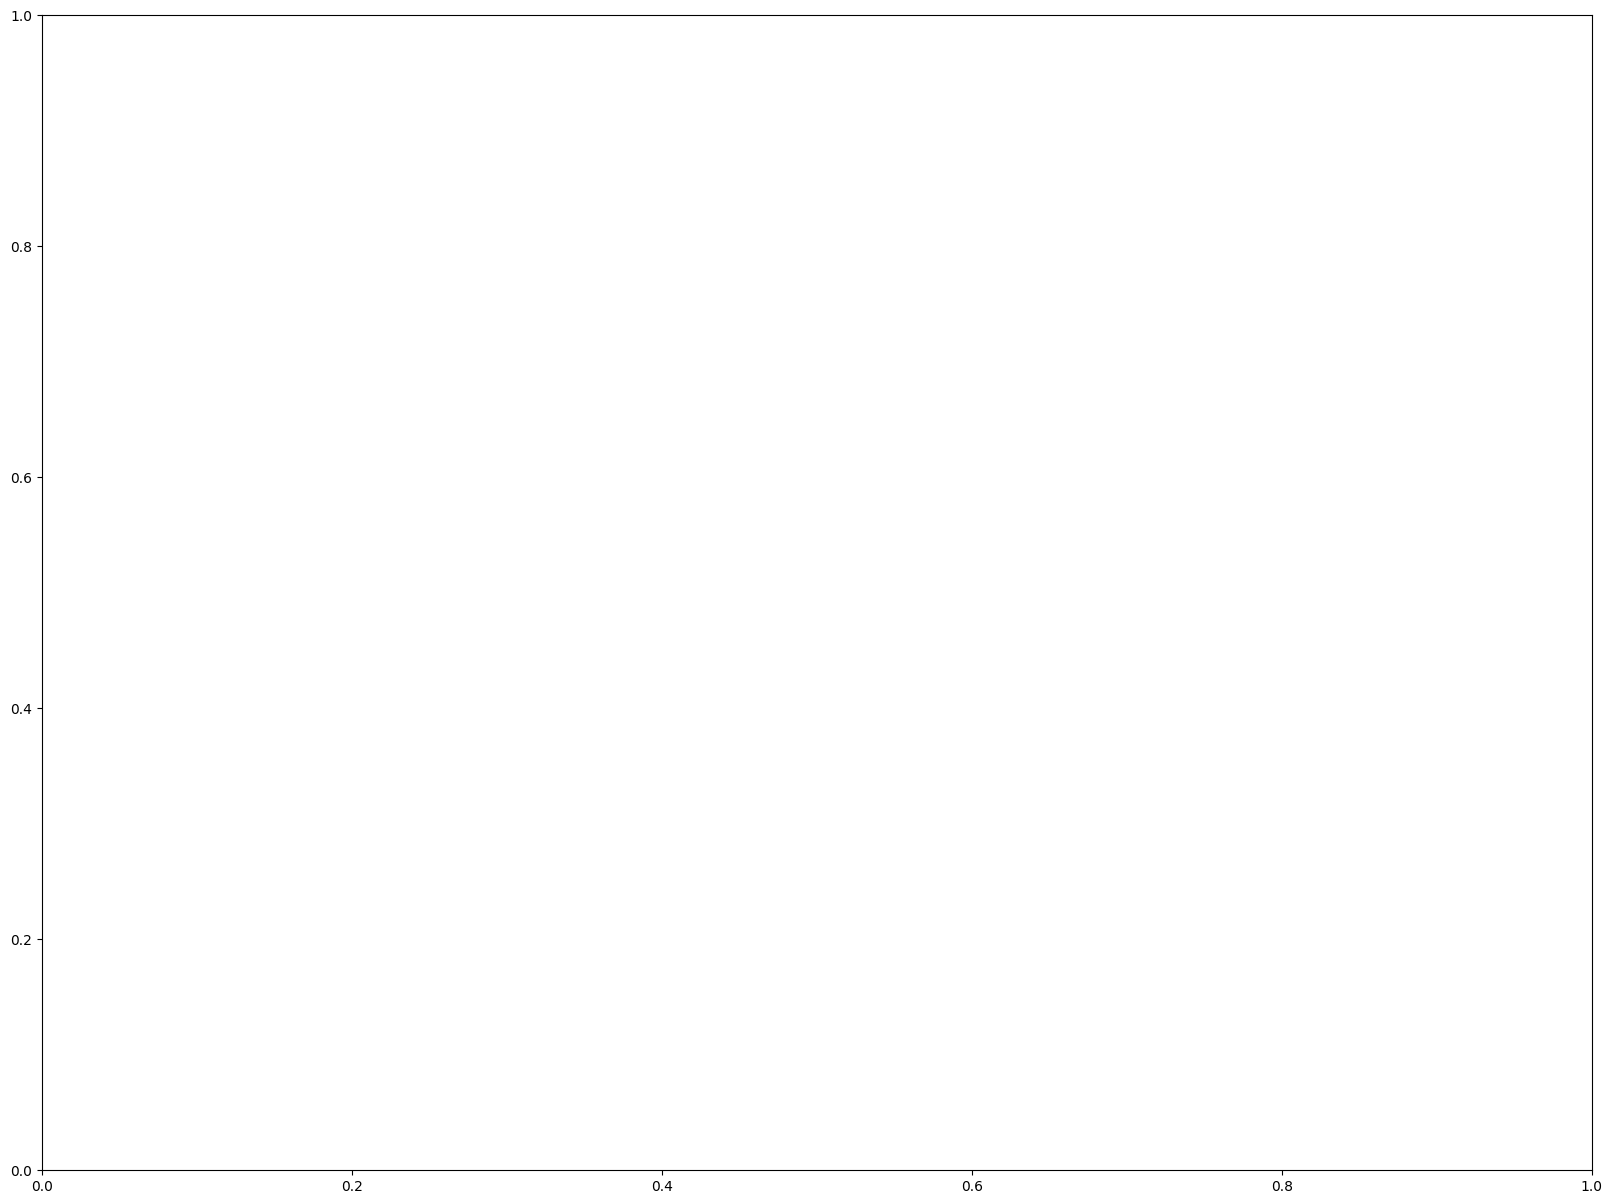

In [93]:
#Visualize latent space
fig=plt.figure(figsize=(20,15))
plt.scatter(encd[:,0],encd[:,1],20,c=ytest[:], cmap='viridis')
plt.title('Encoded Space')
plt.ylabel('Second Encoder Dimention')
plt.xlabel('First Encoder Dimention')
plt.show()

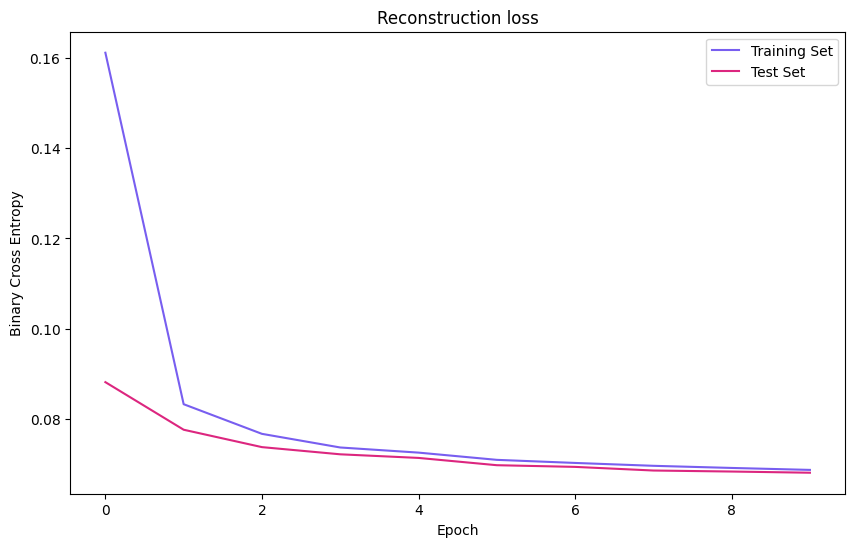

In [94]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [95]:
reconstructed=autoencoder.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


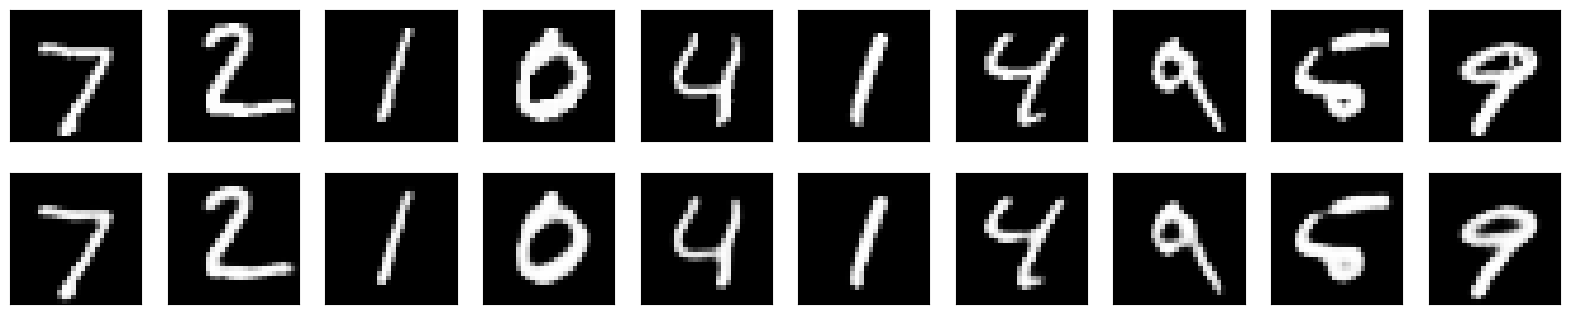

In [96]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()